In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [01:14<00:00, 403.99image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    train_subset.dataset.data[idx] = (new_input, label)



  0%|          | 0/21000 [00:00<?, ?it/s]

100%|██████████| 21000/21000 [05:18<00:00, 66.01it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

# for filters, num_layers in combinations:
#     print("--------------------------------------------------------")
#     print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
#     model = models.HandDetectionModel(filters, num_layers)
#     model.train_model(train, test, epochs=100, early_stopping_patience=10)
#     torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
#     saved_models.append(model)

model = models.PointLabellingModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:40<00:00,  2.05it/s]


Loss: 0.0072, Mean Absolute Error: 0.08074197609056817, Time remaining: 2:23:30.745500


Epoch 2/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.0011, Mean Absolute Error: 0.08040334605314631, Time remaining: 2:34:32.368416


Epoch 3/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.0010, Mean Absolute Error: 0.07977886295857582, Time remaining: 2:35:56.068489


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:14<00:00,  1.69it/s]


Loss: 0.0010, Mean Absolute Error: 0.07292430209828184, Time remaining: 2:34:41.310152


Epoch 5/50 (Training): 100%|██████████| 329/329 [03:14<00:00,  1.69it/s]


Loss: 0.0008, Mean Absolute Error: 0.06886892331803733, Time remaining: 2:32:29.282955


Epoch 6/50 (Training): 100%|██████████| 329/329 [03:14<00:00,  1.69it/s]


Loss: 0.0007, Mean Absolute Error: 0.06680427249917324, Time remaining: 2:29:52.208368


Epoch 7/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.0007, Mean Absolute Error: 0.06441202442696754, Time remaining: 2:27:06.206187


Epoch 8/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0006, Mean Absolute Error: 0.06413253890152307, Time remaining: 2:24:54.768180


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0005, Mean Absolute Error: 0.0615396450293508, Time remaining: 2:22:29.168382


Epoch 10/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0005, Mean Absolute Error: 0.0696443045472211, Time remaining: 2:19:48.291920


Epoch 11/50 (Training): 100%|██████████| 329/329 [03:25<00:00,  1.60it/s]


Loss: 0.0005, Mean Absolute Error: 0.06178141952036543, Time remaining: 2:16:58.311504


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:25<00:00,  1.60it/s]


Loss: 0.0005, Mean Absolute Error: 0.061280057924066454, Time remaining: 2:13:58.054766


Epoch 13/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.06316345626924266, Time remaining: 2:10:46.303916


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0005, Mean Absolute Error: 0.06314598539091171, Time remaining: 2:07:31.887192


Epoch 15/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0004, Mean Absolute Error: 0.061321733341096564, Time remaining: 2:04:10.969330


Epoch 16/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0004, Mean Absolute Error: 0.062263910777549794, Time remaining: 2:00:47.882272


Epoch 17/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.05979972235620656, Time remaining: 1:57:25.821717


Epoch 18/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0004, Mean Absolute Error: 0.06272287702465311, Time remaining: 1:54:02.660000


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.060242008576367766, Time remaining: 1:50:35.536267


Epoch 20/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.060736281995443585, Time remaining: 1:47:09.029280


Epoch 21/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.06013114998077459, Time remaining: 1:43:39.765720


Epoch 22/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0003, Mean Absolute Error: 0.05608219108445213, Time remaining: 1:40:09.200064


Epoch 23/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0003, Mean Absolute Error: 0.05488963308248748, Time remaining: 1:36:39.314151


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.61it/s]


Loss: 0.0002, Mean Absolute Error: 0.058147589378851526, Time remaining: 1:33:09.215034


Epoch 25/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0002, Mean Absolute Error: 0.05675136545633382, Time remaining: 1:29:38.758775


Epoch 26/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0003, Mean Absolute Error: 0.05810117911785207, Time remaining: 1:26:06.320616


Epoch 27/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.059572282722814285, Time remaining: 1:22:33.532172


Epoch 28/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0003, Mean Absolute Error: 0.055197877789589955, Time remaining: 1:19:00.334764


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.05500644229431736, Time remaining: 1:15:26.695992


Epoch 30/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.054856735024046394, Time remaining: 1:11:53.377300


Epoch 31/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.05542505221401758, Time remaining: 1:08:19.570397


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.05576485976021975, Time remaining: 1:04:45.404040


Epoch 33/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.61it/s]


Loss: 0.0002, Mean Absolute Error: 0.05613545205523359, Time remaining: 1:01:11.326885


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.05639954967463904, Time remaining: 0:57:36.683648


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.61it/s]


Loss: 0.0002, Mean Absolute Error: 0.057382314743355235, Time remaining: 0:54:02.035290


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0002, Mean Absolute Error: 0.055285688588752394, Time remaining: 0:50:26.466632


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0002, Mean Absolute Error: 0.05683433514167654, Time remaining: 0:46:51.193177


Epoch 38/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.056026316842341675, Time remaining: 0:43:15.397464


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.61it/s]


Loss: 0.0001, Mean Absolute Error: 0.05535296675689677, Time remaining: 0:39:39.965313


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.05558980357377453, Time remaining: 0:36:03.878110


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.055556501717643536, Time remaining: 0:32:27.945222


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0001, Mean Absolute Error: 0.05645710404248948, Time remaining: 0:28:52.077528


Epoch 43/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.055698143239033986, Time remaining: 0:25:15.924774


Epoch 44/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0001, Mean Absolute Error: 0.05546667034480166, Time remaining: 0:21:39.762624


Epoch 45/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.05544307570349663, Time remaining: 0:18:03.341790


Epoch 46/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.05586987198825846, Time remaining: 0:14:26.875768


Epoch 47/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.05726723111373313, Time remaining: 0:10:50.277303


Epoch 48/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0002, Mean Absolute Error: 0.05607736348471743, Time remaining: 0:07:13.585494


Epoch 49/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.05655912317811174, Time remaining: 0:03:36.839792


Epoch 50/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.64it/s]


Loss: 0.0001, Mean Absolute Error: 0.055381031330437105, Time remaining: 0:00:00


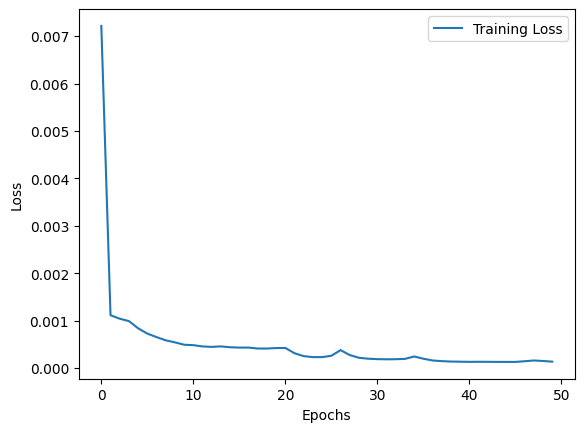

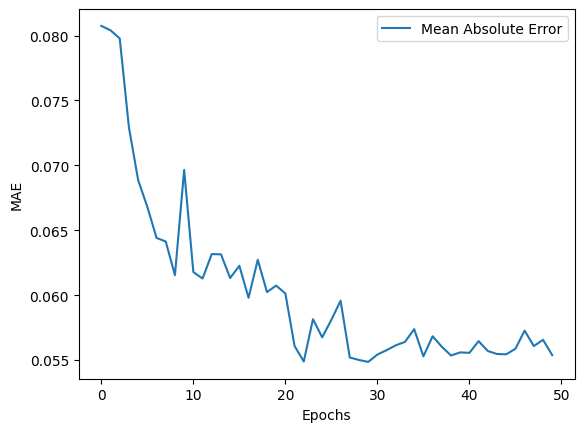

In [8]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:16<00:00,  5.83it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.022640138864517212, 0.05586754158139229, 0.06218583881855011, 0.061765752732753754, 0.07227932661771774, 0.09592008590698242, 0.034605395048856735, 0.04401962086558342, 0.04572353884577751, 0.14971359074115753, 0.1364399492740631, 0.03718377649784088, 0.12434999644756317, 0.05434734746813774, 0.052153848111629486, 0.03789043799042702, 0.14576958119869232, 0.06688694655895233, 0.11827851086854935, 0.12138806283473969, 0.10221614688634872, 0.050156641751527786, 0.03428744152188301, 0.08849205076694489, 0.06086613982915878, 0.10945682972669601, 0.05187759920954704, 0.12004759162664413, 0.03930103778839111, 0.04281943663954735, 0.0595485158264637, 0.06050126254558563, 0.07693571597337723, 0.036468397825956345, 0.052154526114463806, 0.03851373493671417, 0.04004107043147087, 0.10424859821796417, 0.03909473866224289, 0.09422383457422256, 0.08846613019704819, 0.04129289835691452, 0.02684694528579712, 0.07518476247787476, 0.11565800756216049, 0.05653280392289162, 0.06320922076702118, 0.07649

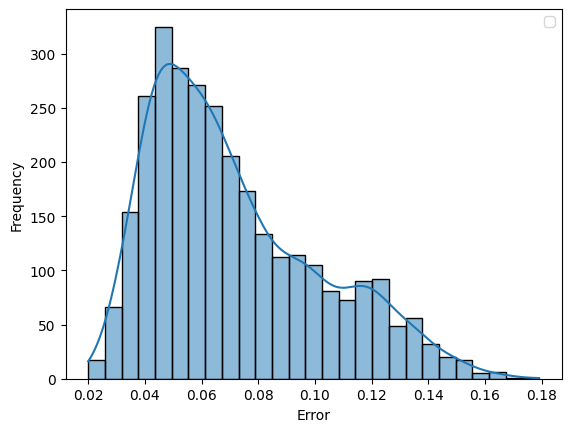

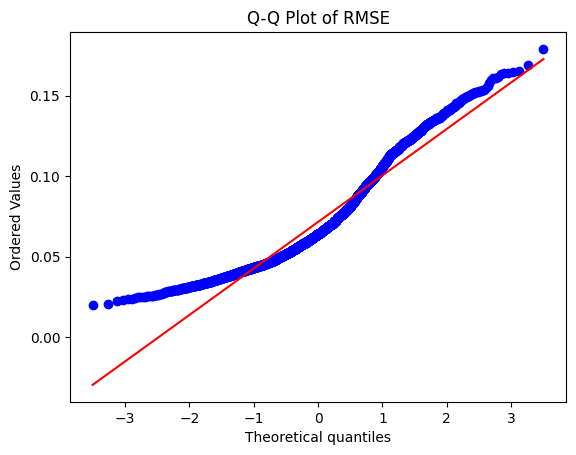

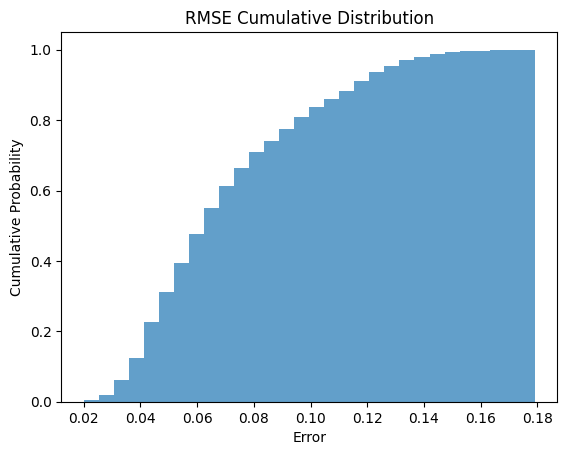

(3000, 21, 3)


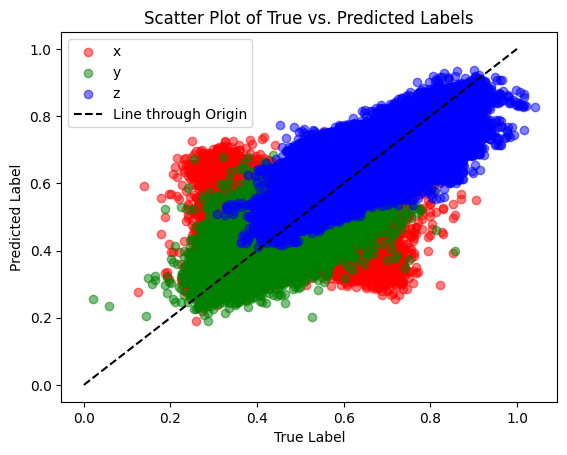

In [9]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [10]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

0.33479878306388855
0.4379279315471649
0.5208176970481873
0.5820895433425903
0.6564263701438904
0.5407743453979492
0.5960123538970947
0.6259154081344604
0.6503969430923462
0.5093586444854736
0.5490807890892029
0.5651895403862
0.5829169750213623
0.4483746290206909
0.48184043169021606
0.49104124307632446
0.5010883808135986
0.39684125781059265
0.41130754351615906
0.4153977930545807
0.4272635579109192


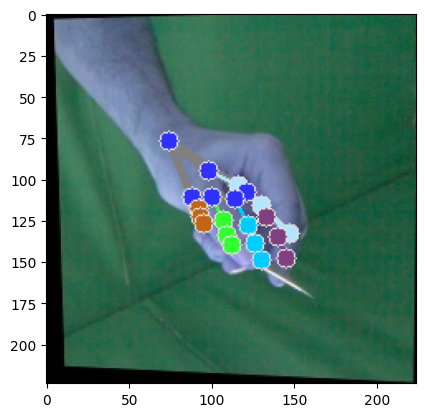

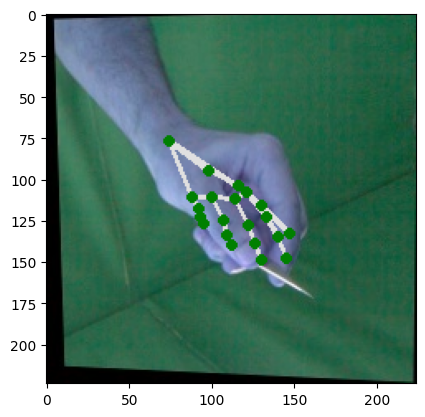

In [12]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00000999.jpg"
image = Image.open(file)

# model = models.PointLabellingModel().to(device)


# model.load_state_dict(torch.load("models/points_20231228-024753.pt"))
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))



mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
mp_drawing.draw_landmarks(
            img,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

# mp_drawing.plot_landmarks(
#                     hand_landmarks,
#                     mp_hands.HAND_CONNECTIONS)
# plt.imshow(cv2.imread(file))